# *** Import Libraries ***

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns #for confusion matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from scipy.special import expit
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

## 1. Import the data dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/ (Links to an external site.) (1 points).

In [119]:
colnames=['col0', 'col1', 'col2','col4', 'class'] 
irisData=pd.read_csv('./data/iris.data',names=colnames, header=None)

## 2. Identify the presence of missing values, write the code to fill the missing values with mean for numerical attributes and mode value for categorical attributes. (1 points)

In [120]:
irisData.isnull().sum()

col0     0
col1     0
col2     0
col4     0
class    0
dtype: int64

In [121]:
set(irisData['class'].tolist())

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [122]:
irisData[['class']]=irisData[['class']].replace(to_replace={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

### 2.1 Correlation Check

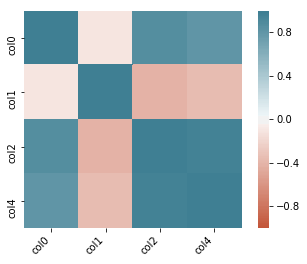

In [195]:
corr = irisData[irisData.columns[0:4]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As we can see from the above graph, that the correlation value is ranging from <b> 0.0</b> to <b>0.9</b>. So for more feature visualization we can neglect the feature with correlation greater than or equal to <b>0.85</b>

In [198]:
columns = np.full((corr_df.shape[0],), True, dtype=bool)
for i in range(corr_df.shape[0]):
    for j in range(i+1, corr_df.shape[0]):
        if corr_df.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
selected_columns = irisData[irisData.columns[0:4]].columns[columns]
X_without_corr = irisData[irisData.columns[0:4]][selected_columns]

In [199]:
print(X_without_corr)

     col0  col1
0     5.1   3.5
1     4.9   3.0
2     4.7   3.2
3     4.6   3.1
4     5.0   3.6
..    ...   ...
145   6.7   3.0
146   6.3   2.5
147   6.5   3.0
148   6.2   3.4
149   5.9   3.0

[150 rows x 2 columns]


Hence We can use <b>col0</b> and <b>col1</b> for further data modelling because other features are highly correlated.
As there is no missing values in the dataset, therefore, we are not processing any missing  here

## 3. Extract X as all columns except the Class column and Y as Class column. (1 points) 

In [200]:
X=irisData[irisData.columns[0:2]].values
Y=irisData['class'].values

## 4. Split the data into training set and testing set. (1 points)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=323,stratify= Y)

# 5.Model the classifier using GaussianNB, BernoulliNB and MultinomialNB (3 points)

### 5.1 GaussianNB Model

In [218]:
irisGaussianModel = GaussianNB()
irisGaussianModel.fit(X_train, y_train)
trainGausActual=y_train
trainGausPredicted=irisGaussianModel.predict(X_train)
gaussianExpected = y_test
gaussianPredicted = irisGaussianModel.predict(X_test)

### 5.2 BernoulliNB Model

In [222]:
irisBernoulliNBModel = BernoulliNB(alpha=0.00001,class_prior = [1,1,1])
irisBernoulliNBModel.fit(X_train, y_train)
trainBernActual=y_train
trainBernPredicted=irisBernoulliNBModel.predict(X_train)
bernoulliExpected = y_test
bernoulliPredicted=irisBernoulliNBModel.predict(X_test)

### 5.3 MultinomialNB Model

In [223]:
irisMultinomialModel = MultinomialNB()
irisMultinomialModel.fit(X_train, y_train)
trainMultiActual=y_train
trainMultiPredicted=irisMultinomialModel.predict(X_train)
multinomialExpected = y_test
multinomialPredicted=irisMultinomialModel.predict(X_test)

# 6.Compute the accuracy and confusion matrix for each models. (3 points)

### 6.1 GaussianNB Model

In [224]:
print(" ********************************** Train Results Start Here ********************************** \n")

print(classification_report(trainGausActual,trainGausPredicted))
print(confusion_matrix(trainGausActual, trainGausPredicted))
accuracyScore=accuracy_score(trainGausActual, trainGausPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %","\n")


print(" ********************************** Test Results Start Here ********************************** \n")
print(classification_report(gaussianExpected, gaussianPredicted))
print(confusion_matrix(gaussianExpected, gaussianPredicted))
accuracyScore=accuracy_score(gaussianExpected, gaussianPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

 ********************************** Train Results Start Here ********************************** 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       0.69      0.72      0.70        43
           3       0.70      0.67      0.68        42

    accuracy                           0.80       127
   macro avg       0.80      0.80      0.80       127
weighted avg       0.80      0.80      0.80       127

[[42  0  0]
 [ 0 31 12]
 [ 0 14 28]]
The Accuracy Score is 80.0  % 

 ********************************** Test Results Start Here ********************************** 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.50      0.86      0.63         7
           3       0.67      0.25      0.36         8

    accuracy                           0.70        23
   macro avg       0.72      0.70      0.67        23
weighted avg       0.73      

### 6.2 BernoulliNB Model

In [225]:
print(" ********************************** Train Results Start Here ********************************** \n")

print(classification_report(trainBernActual, trainBernPredicted))
print(confusion_matrix(trainBernActual, trainBernPredicted))
accuracyScore=accuracy_score(trainBernActual, trainBernPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %","\n")

print(" ********************************** Test Results Start Here ********************************** \n")

print(classification_report(bernoulliExpected, bernoulliPredicted))
print(confusion_matrix(bernoulliExpected, bernoulliPredicted))
accuracyScore=accuracy_score(bernoulliExpected, bernoulliPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

 ********************************** Train Results Start Here ********************************** 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        42
           2       0.34      1.00      0.51        43
           3       0.00      0.00      0.00        42

    accuracy                           0.34       127
   macro avg       0.11      0.33      0.17       127
weighted avg       0.11      0.34      0.17       127

[[ 0 42  0]
 [ 0 43  0]
 [ 0 42  0]]
The Accuracy Score is 34.0  % 

 ********************************** Test Results Start Here ********************************** 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.30      1.00      0.47         7
           3       0.00      0.00      0.00         8

    accuracy                           0.30        23
   macro avg       0.10      0.33      0.16        23
weighted avg       0.09      

C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

### 6.3 MultinomialNB Model

In [226]:
print(" ********************************** Train Results Start Here ********************************** \n")

print(classification_report(trainMultiActual, trainMultiPredicted))
print(confusion_matrix(trainMultiActual, trainMultiPredicted))
accuracyScore=accuracy_score(trainMultiActual, trainMultiPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %","\n")

print(" ********************************** Test Results Start Here ********************************** \n")

print(classification_report(multinomialExpected, multinomialPredicted))
print(confusion_matrix(multinomialExpected, multinomialPredicted))
accuracyScore=accuracy_score(multinomialExpected, multinomialPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

 ********************************** Train Results Start Here ********************************** 

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        42
           2       0.50      1.00      0.67        43
           3       0.00      0.00      0.00        42

    accuracy                           0.66       127
   macro avg       0.50      0.66      0.55       127
weighted avg       0.50      0.66      0.55       127

[[41  1  0]
 [ 0 43  0]
 [ 0 42  0]]
The Accuracy Score is 66.0  % 

 ********************************** Test Results Start Here ********************************** 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.47      1.00      0.64         7
           3       0.00      0.00      0.00         8

    accuracy                           0.65        23
   macro avg       0.49      0.67      0.55        23
weighted avg       0.49      

C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chib\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

# 7. Plot the decision boundary, visualize training and test results of all the models (3 points)

### 7.1 GaussianNB Model Training Visualization

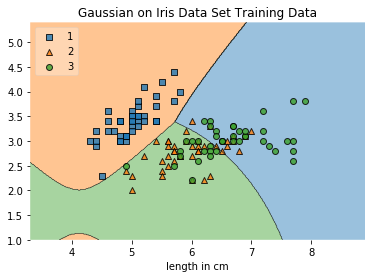

In [227]:
plot_decision_regions(X_train,y_train, clf=irisGaussianModel, legend=2)
plt.xlabel('length in cm')
plt.title('Gaussian on Iris Data Set Training Data')
plt.show()

### 7.2 GaussianNB Model Testing Visualization

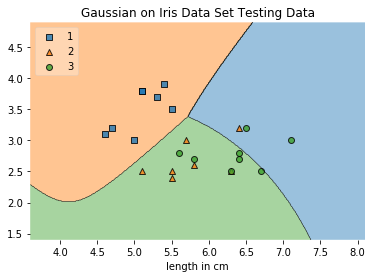

In [228]:
plot_decision_regions(X_test,y_test, clf=irisGaussianModel, legend=2)
plt.xlabel('length in cm')
plt.title('Gaussian on Iris Data Set Testing Data')
plt.show()

### 7.3 BernoulliNB Model Training Visualization

C:\anaconda3\envs\python3.7\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


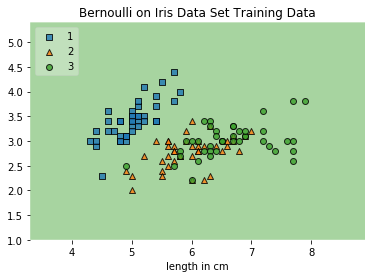

In [229]:
plot_decision_regions(X_train,y_train, clf=irisBernoulliNBModel, legend=2)
plt.xlabel('length in cm')
plt.title('Bernoulli on Iris Data Set Training Data')
plt.show()

### 7.4 BernoulliNB Model Testing Visualization

C:\anaconda3\envs\python3.7\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


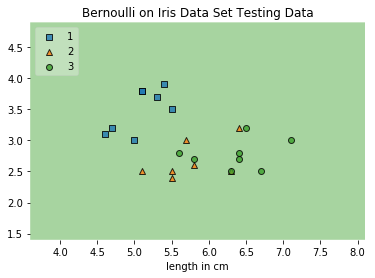

In [230]:
plot_decision_regions(X_test,y_test, clf=irisBernoulliNBModel, legend=2)
plt.xlabel('length in cm')
plt.title('Bernoulli on Iris Data Set Testing Data')
plt.show()

### 7.5 MulinominalNB Model Training Visualization

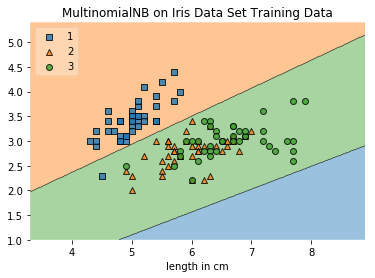

In [231]:
plot_decision_regions(X_train,y_train, clf=irisMultinomialModel, legend=2)
plt.xlabel('length in cm')
plt.title('MultinomialNB on Iris Data Set Training Data')
plt.show()

### 7.6 MulinominalNB Model Testing Visualization

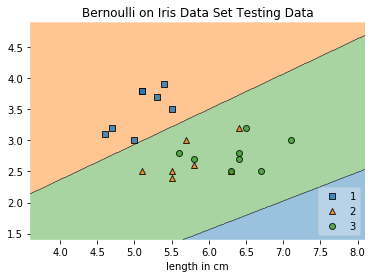

In [232]:
plot_decision_regions(X_test,y_test, clf=irisMultinomialModel, legend=4)
plt.xlabel('length in cm')
plt.title('Bernoulli on Iris Data Set Testing Data')
plt.show()